In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [ ]:
!pip install category_encoders

In [ ]:
df = pd.read_csv("/content/HR-Employee-Attrition.csv"  )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df["Attrition"] = (df['Attrition'] == 'Yes').astype(int)

In [ ]:
df["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [ ]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<ipython-input-12-d1c4083e2fdb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

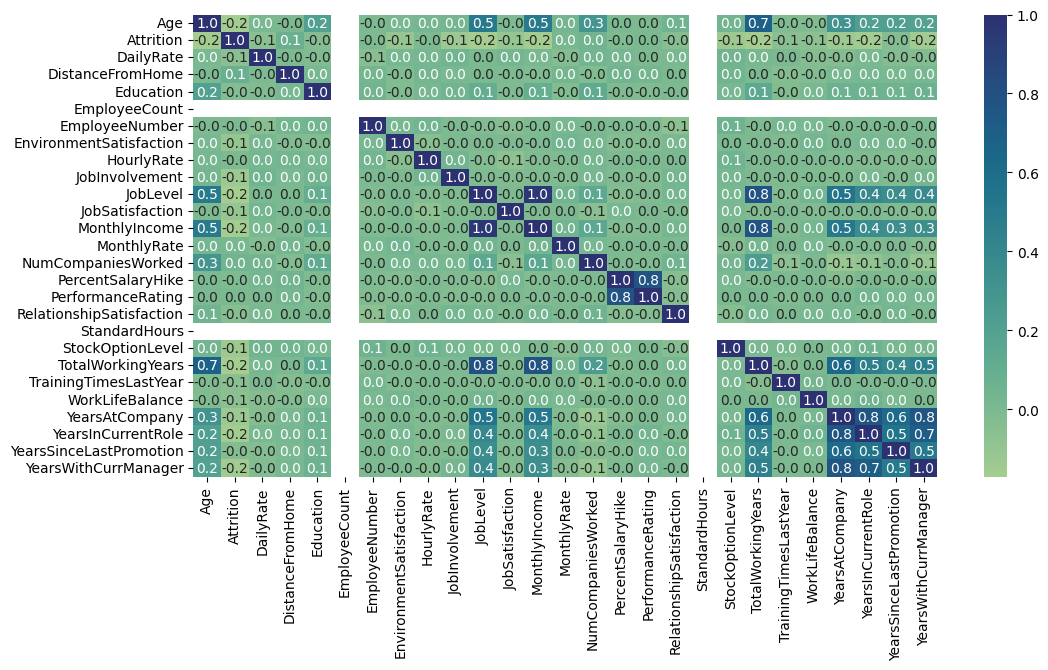

In [ ]:
corr = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot = True,fmt='.1f',cmap = 'crest')

In [ ]:
X = df.drop(columns = ['Attrition'])
Y = df.Attrition

In [ ]:
from category_encoders import OneHotEncoder

In [ ]:
X_train , X_test , y_train , y_test= train_test_split(X,Y,test_size=0.1)

In [ ]:
model = make_pipeline(
    OneHotEncoder(),
    LogisticRegression(max_iter=1000, solver="liblinear")
)

model.fit(X_train, y_train)


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['BusinessTravel', 'Department',
                                     'EducationField', 'Gender', 'JobRole',
                                     'MaritalStatus', 'Over18', 'OverTime'])),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

In [ ]:
model.score(X_train , y_train)

0.8835978835978836

In [ ]:
df=df.drop(columns=['JobLevel','MonthlyIncome','TotalWorkingYears','YearsAtCompany','YearsWithCurrManager','NumCompaniesWorked','PercentSalaryHike',])

<ipython-input-19-d1c4083e2fdb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

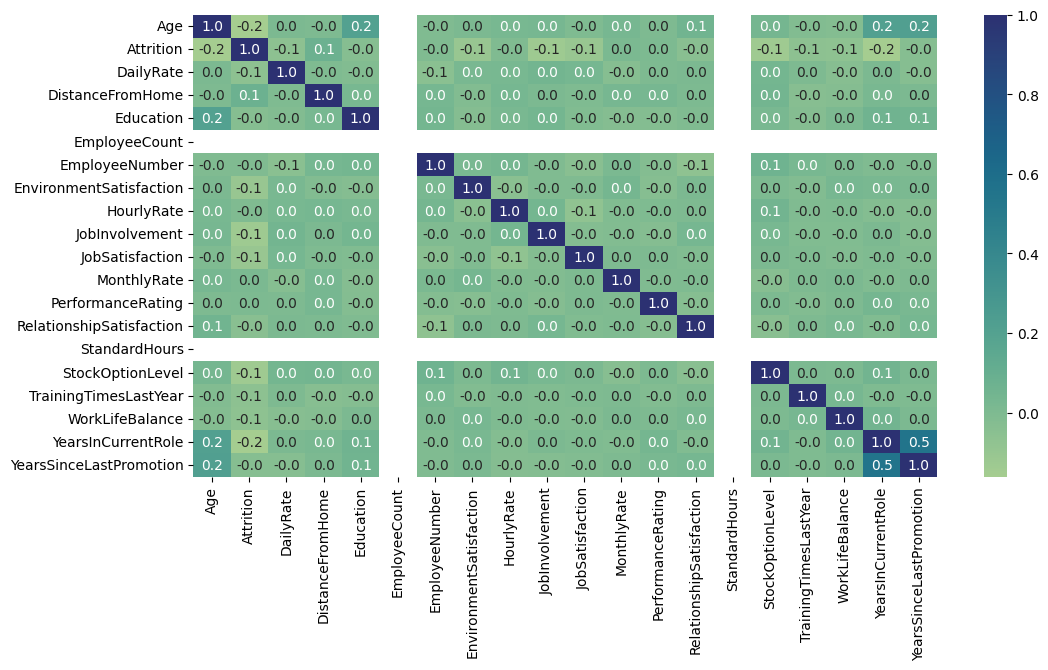

In [ ]:
corr = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot = True,fmt='.1f',cmap = 'crest')

In [ ]:
model.score(X_train , y_train)

0.8835978835978836

In [ ]:
features = model.named_steps["onehotencoder"].get_feature_names_out()
importances = model.named_steps["logisticregression"].coef_[0]

In [ ]:
odds_ratios = pd.Series(np.exp(importances),index = features).sort_values()
odds_ratios.head()

OverTime_2                 0.498394
JobInvolvement             0.654046
EnvironmentSatisfaction    0.716069
JobSatisfaction            0.717122
StockOptionLevel           0.720261
dtype: float64

<Axes: >

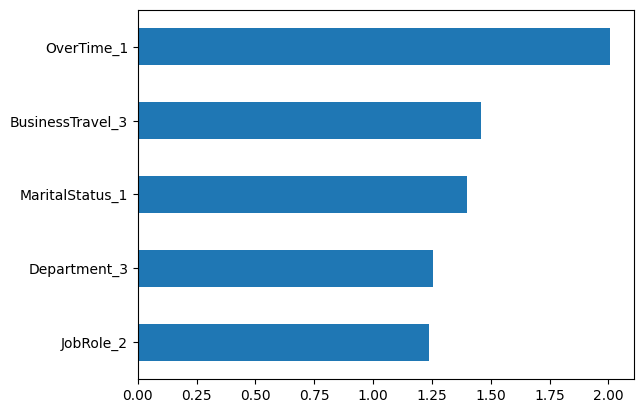

In [ ]:
odds_ratios.tail().plot(kind="barh")

<Axes: >

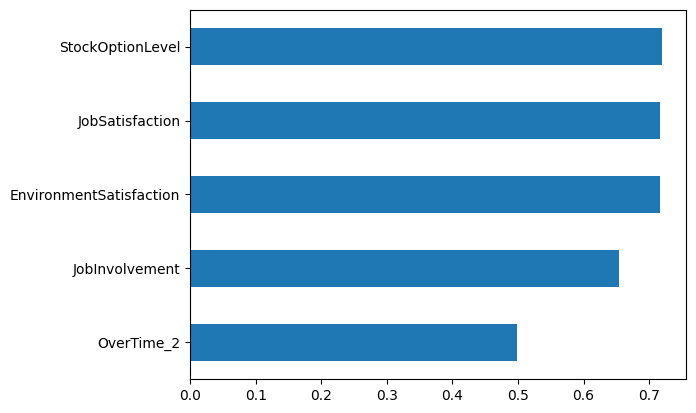

In [ ]:
odds_ratios.head().plot(kind="barh")

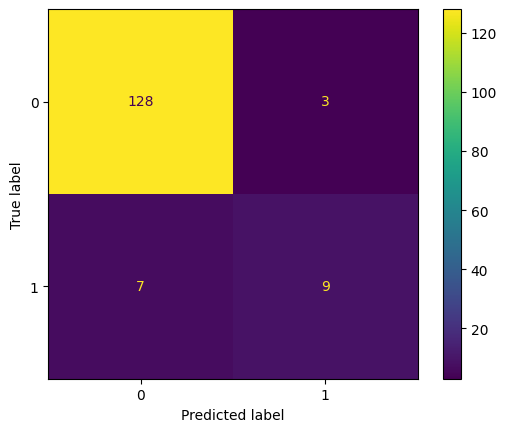

In [ ]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [ ]:
probabilities = model.predict_proba (X_test) [:, 1]
default_predictions =(probabilities >= 0.5).astype(int)
default_cm = confusion_matrix(y_test, default_predictions)
print("Confusion Matrix (Default Threshold 8.5):")
print(default_cm)
#Adjust threshold to 0.4
adjusted_threshold = 0.7
adjusted_predictions= (probabilities >= adjusted_threshold).astype(int)
adjusted_cm= confusion_matrix(y_test, adjusted_predictions)
print("InConfusion Matrix (Adjusted Threshold 8.7):")
print(adjusted_cm)

Confusion Matrix (Default Threshold 8.5):
[[128   3]
 [  7   9]]
InConfusion Matrix (Adjusted Threshold 8.7):
[[131   0]
 [ 13   3]]
